In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import os
import random

# Importing the pictures from UTK Face

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Specify the directory containing the images
image_dir = '../input/utkface-new/UTKFace'

# Create a list of image file paths and labels
image_file_paths = []
ages = []
genders = []
ethnicities = []

count = 0  # Counting non-compatible files
for i in os.listdir(image_dir):
    split = i.split('_')
    try:
        ethnicities.append(int(split[2]))
        ages.append(int(split[0]))
        genders.append(int(split[1]))
        # Store the image file path
        image_file_paths.append(os.path.join(image_dir, i))
    except:
        count += 1
        continue

# Define a function to load and preprocess images
def load_and_preprocess_image(file_path):
    # Load the image and resize it
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (299, 299))  # Adjust the input shape for InceptionV3
    image = preprocess_input(image)  # Use InceptionV3 preprocessing
    return image

# Define a custom data generator function
def custom_data_generator(image_paths, ages, genders, ethnicities, batch_size=32):
    num_samples = len(image_paths)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            
            batch_images = [load_and_preprocess_image(image_paths[i]) for i in batch_indices]
            batch_ages = [ages[i] for i in batch_indices]
            batch_genders = [genders[i] for i in batch_indices]
            batch_ethnicities = [ethnicities[i] for i in batch_indices]
            
            yield (np.array(batch_images), {'age': np.array(batch_ages), 'gender': np.array(batch_genders), 'ethnicity': np.array(batch_ethnicities)})



# ANALYSIS

In [14]:
# Load a few samples from the dataset
num_samples_to_display = 5  # Change this number to display more or fewer samples

sample_indices = np.random.choice(len(image_file_paths), num_samples_to_display, replace=False)
sample_images = [load_and_preprocess_image(image_file_paths[i]) for i in sample_indices]
sample_ages = [ages[i] for i in sample_indices]
sample_genders = [genders[i] for i in sample_indices]
sample_ethnicities = [ethnicities[i] for i in sample_indices]

# Display information about the sample images and labels
for i in range(num_samples_to_display):
    print(f"Sample {i+1}:")
    print(f"Age: {sample_ages[i]}, Gender: {sample_genders[i]}, Ethnicity: {sample_ethnicities[i]}")
    # Display or visualize the sample image (e.g., using Matplotlib)
    # You can use plt.imshow(sample_images[i]) if using Matplotlib
    print("Image shape:", sample_images[i].shape)
    print()


Sample 1:
Age: 32, Gender: 1, Ethnicity: 1
Image shape: (299, 299, 3)

Sample 2:
Age: 22, Gender: 0, Ethnicity: 0
Image shape: (299, 299, 3)

Sample 3:
Age: 38, Gender: 0, Ethnicity: 0
Image shape: (299, 299, 3)

Sample 4:
Age: 29, Gender: 1, Ethnicity: 1
Image shape: (299, 299, 3)

Sample 5:
Age: 19, Gender: 0, Ethnicity: 2
Image shape: (299, 299, 3)



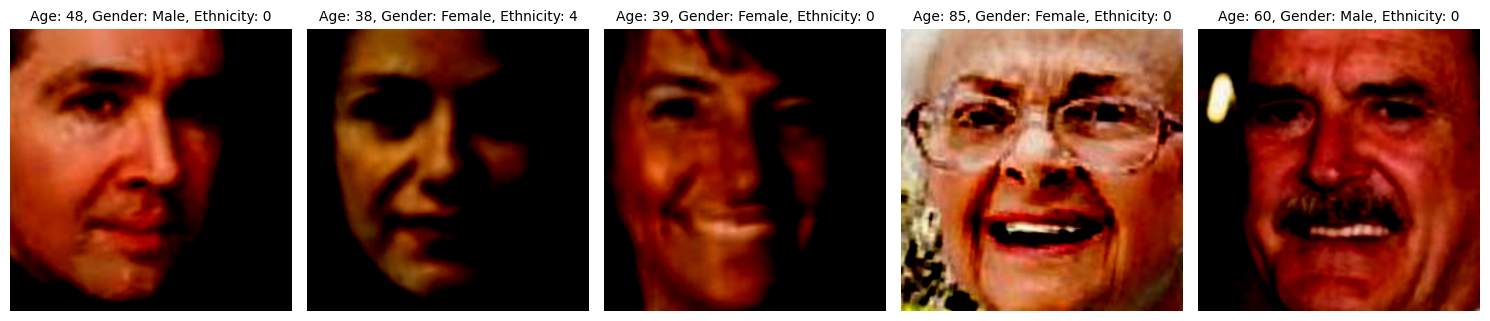

In [16]:
import matplotlib.pyplot as plt

# Load and preprocess a few sample images with labels
num_samples_to_display = 5  

sample_indices = np.random.choice(len(image_file_paths), num_samples_to_display, replace=False)
sample_images = [load_and_preprocess_image(image_file_paths[i]) for i in sample_indices]
sample_ages = [ages[i] for i in sample_indices]
sample_genders = [genders[i] for i in sample_indices]
sample_ethnicities = [ethnicities[i] for i in sample_indices]

# Create a list of captions
captions = [f"Age: {age}, Gender: {'Male' if gender == 0 else 'Female'}, Ethnicity: {ethnicity}" 
            for age, gender, ethnicity in zip(sample_ages, sample_genders, sample_ethnicities)]

# Display images with captions
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 5))

for i, (image, caption) in enumerate(zip(sample_images, captions)):
    axes[i].imshow(image)
    axes[i].set_title(caption, fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


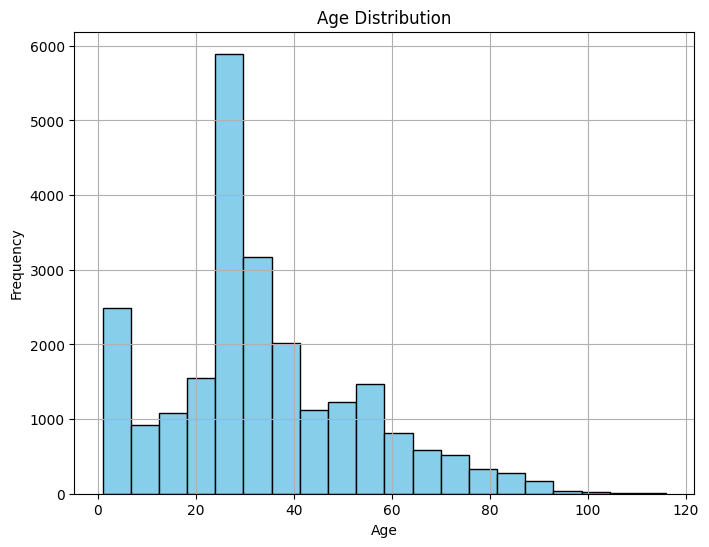

In [19]:
import matplotlib.pyplot as plt

# Plotting age groups
plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

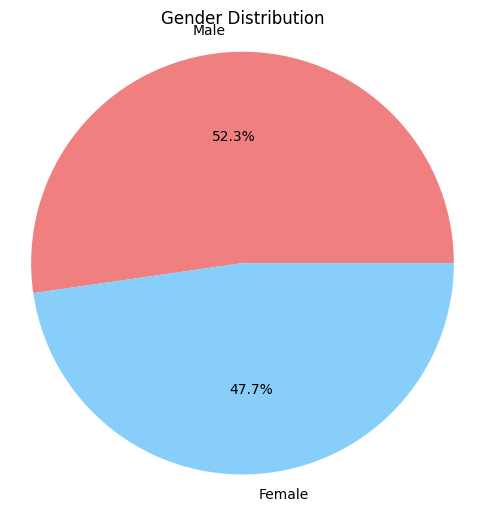

In [20]:
# Plotting gender distribution
gender_labels = ['Male', 'Female']
gender_counts = [genders.count(0), genders.count(1)]

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

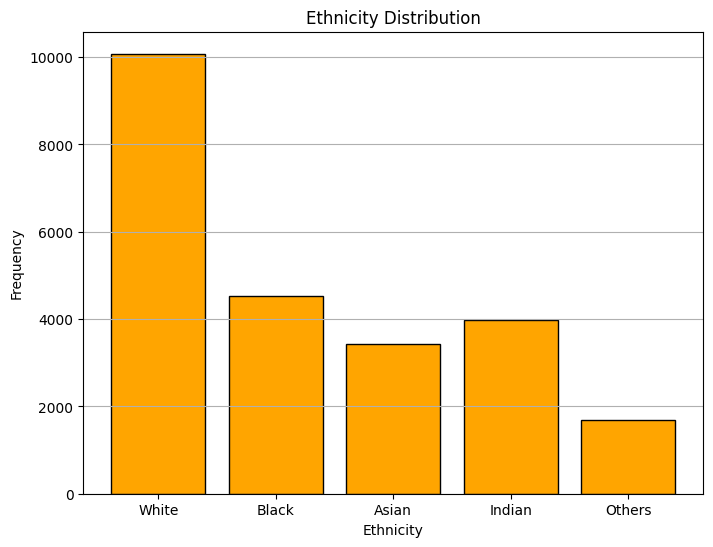

In [29]:
import matplotlib.pyplot as plt

# Mapping of group numbers to ethnicity labels
ethnicity_mapping = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}

# Replace group numbers with ethnicity labels
ethnicity_labels = [ethnicity_mapping[ethnicity] for ethnicity in ethnicities]

# Plotting ethnicity distribution with replaced labels
ethnicity_labels_unique = list(ethnicity_mapping.values())
ethnicity_counts_replaced = [ethnicity_labels.count(label) for label in ethnicity_labels_unique]

plt.figure(figsize=(8, 6))
plt.bar(ethnicity_labels_unique, ethnicity_counts_replaced, color='orange', edgecolor='black')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

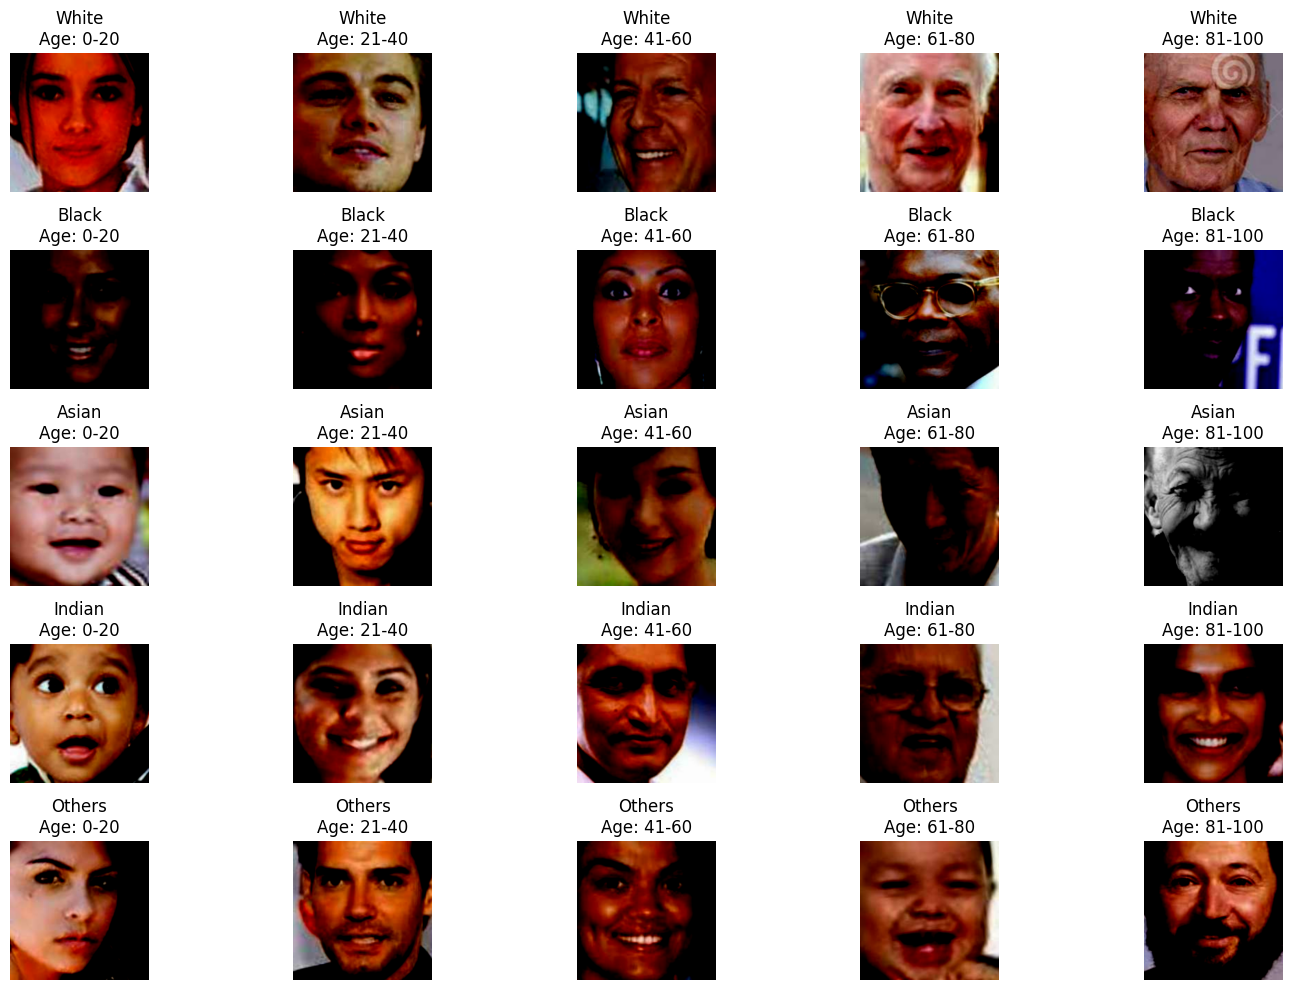

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Mapping of group numbers to ethnicity labels
ethnicity_mapping = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}

# Replace group numbers with ethnicity labels
ethnicity_labels = [ethnicity_mapping[ethnicity] for ethnicity in ethnicities]

# Define age groups
age_bins = [0, 20, 40, 60, 80, 100]
age_groups = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Categorize ages into age groups
age_labels = []
for age in ages:
    for i, bin_val in enumerate(age_bins):
        if age <= bin_val:
            age_labels.append(age_groups[i - 1])
            break

# Define subplots for each combination of ethnicity, age, and gender
fig, axs = plt.subplots(len(ethnicity_mapping), len(age_groups), figsize=(15, 10))

for i, (ethnicity_key, ethnicity) in enumerate(ethnicity_mapping.items()):
    for j, age_group in enumerate(age_groups):
        # Filter images based on ethnicity and age group
        filtered_indices = [
            idx for idx, (eth, age) in enumerate(zip(ethnicity_labels, age_labels)) 
            if eth == ethnicity and age == age_group
        ]
        
        # Choose a sample image from the filtered indices (or display a placeholder if none)
        if filtered_indices:
            sample_index = filtered_indices[0]  # Change this logic as needed
            sample_image = load_and_preprocess_image(image_file_paths[sample_index])
            axs[i, j].imshow(sample_image)
            axs[i, j].set_title(f'{ethnicity}\nAge: {age_group}')
        else:
            axs[i, j].axis('off')  # Hide the subplot if no image is available

        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


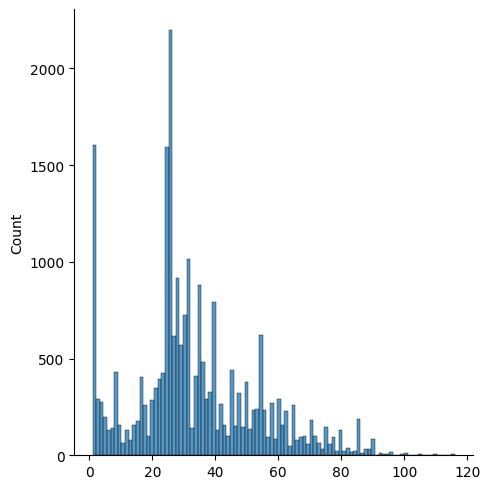

In [3]:
sns.displot(ages,bins = 100)

# Creating the Layers for the Model

In [32]:
!pip install mtcnn

In [33]:
import cv2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define input shape for images (299x299 pixels for InceptionV3)
input_shape = (299, 299, 3)

# Create the InceptionV3 base model (excluding the top classification layers) and specify the input shape
base_model = InceptionV3(input_shape=input_shape, include_top=False)

# Freeze the weights of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Apply Global Average Pooling to the output of the base model
global_avg_pooling = GlobalAveragePooling2D()(base_model.output)

# Modify the task-specific branches
# Age estimation branch
age_dense = Dense(128, activation='relu')(global_avg_pooling)
age_output = Dense(1, activation='relu', name='age')(age_dense)

# Gender classification branch
gender_dense = Dense(64, activation='relu')(global_avg_pooling)
gender_output = Dense(1, activation='sigmoid', name='gender')(gender_dense)

# Ethnicity classification branch
ethnicity_dense = Dense(64, activation='relu')(global_avg_pooling)
ethnicity_output = Dense(5, activation='softmax', name='ethnicity')(ethnicity_dense)

# Create a multi-task model with the shared InceptionV3 base and global average pooling
model = Model(inputs=base_model.input, outputs=[age_output, gender_output, ethnicity_output])

# Define loss functions for each task
losses = {
    'age': 'mean_squared_error',
    'gender': 'binary_crossentropy',
    'ethnicity': 'sparse_categorical_crossentropy'
}

# Define weights for each task (you can adjust these based on task importance)
loss_weights = {
    'age': 1,
    'gender': 0.3,
    'ethnicity': 0.5
}

# Compile the model
model.compile(optimizer='adam', loss=losses, loss_weights=loss_weights, metrics=['accuracy'])


In [121]:

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

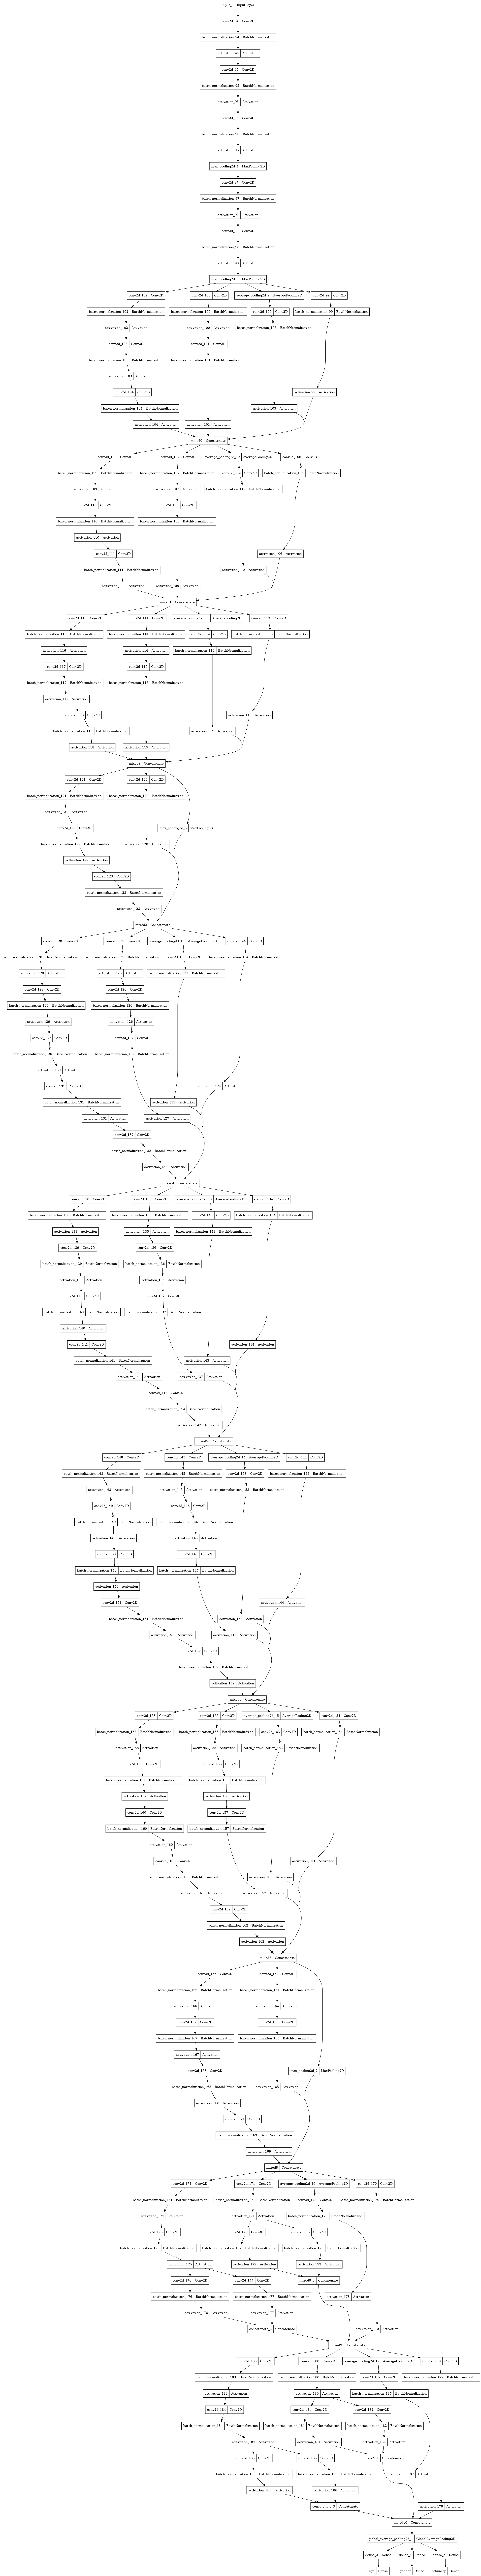

In [122]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Define the number of epochs and batch size
num_epochs = 30
batch_size = 32

# Define the custom data generator
train_data_generator = custom_data_generator(image_file_paths, ages, genders, ethnicities, batch_size=batch_size)

# Define callbacks for monitoring the training
callbacks = [
    ModelCheckpoint("model_checkpoint.h5", save_best_only=True),
    EarlyStopping(patience=5),
    TensorBoard(log_dir="./logs"),
]

# Train the model using the data generator and callbacks
history = model.fit(
    train_data_generator,
    steps_per_epoch=len(image_file_paths) // batch_size,
    epochs=num_epochs,
    callbacks=callbacks
)

Epoch 1/30
740/740 [==============================] - 205s 268ms/step - loss: 175.1955 - age_loss: 174.5746 - gender_loss: 0.3424 - ethnicity_loss: 1.0364 - age_accuracy: 0.0183 - gender_accuracy: 0.8460 - ethnicity_accuracy: 0.6111
Epoch 2/30
740/740 [==============================] - 177s 240ms/step - loss: 124.3848 - age_loss: 123.8444 - gender_loss: 0.2998 - ethnicity_loss: 0.9007 - age_accuracy: 0.0115 - gender_accuracy: 0.8674 - ethnicity_accuracy: 0.6680
Epoch 3/30
740/740 [==============================] - 178s 241ms/step - loss: 117.6421 - age_loss: 117.1296 - gender_loss: 0.2816 - ethnicity_loss: 0.8561 - age_accuracy: 0.0108 - gender_accuracy: 0.8799 - ethnicity_accuracy: 0.6876
Epoch 4/30
740/740 [==============================] - 178s 240ms/step - loss: 110.6564 - age_loss: 110.1644 - gender_loss: 0.2740 - ethnicity_loss: 0.8194 - age_accuracy: 0.0111 - gender_accuracy: 0.8841 - ethnicity_accuracy: 0.7013
Epoch 5/30
740/740 [==============================] - 177s 239ms/ste

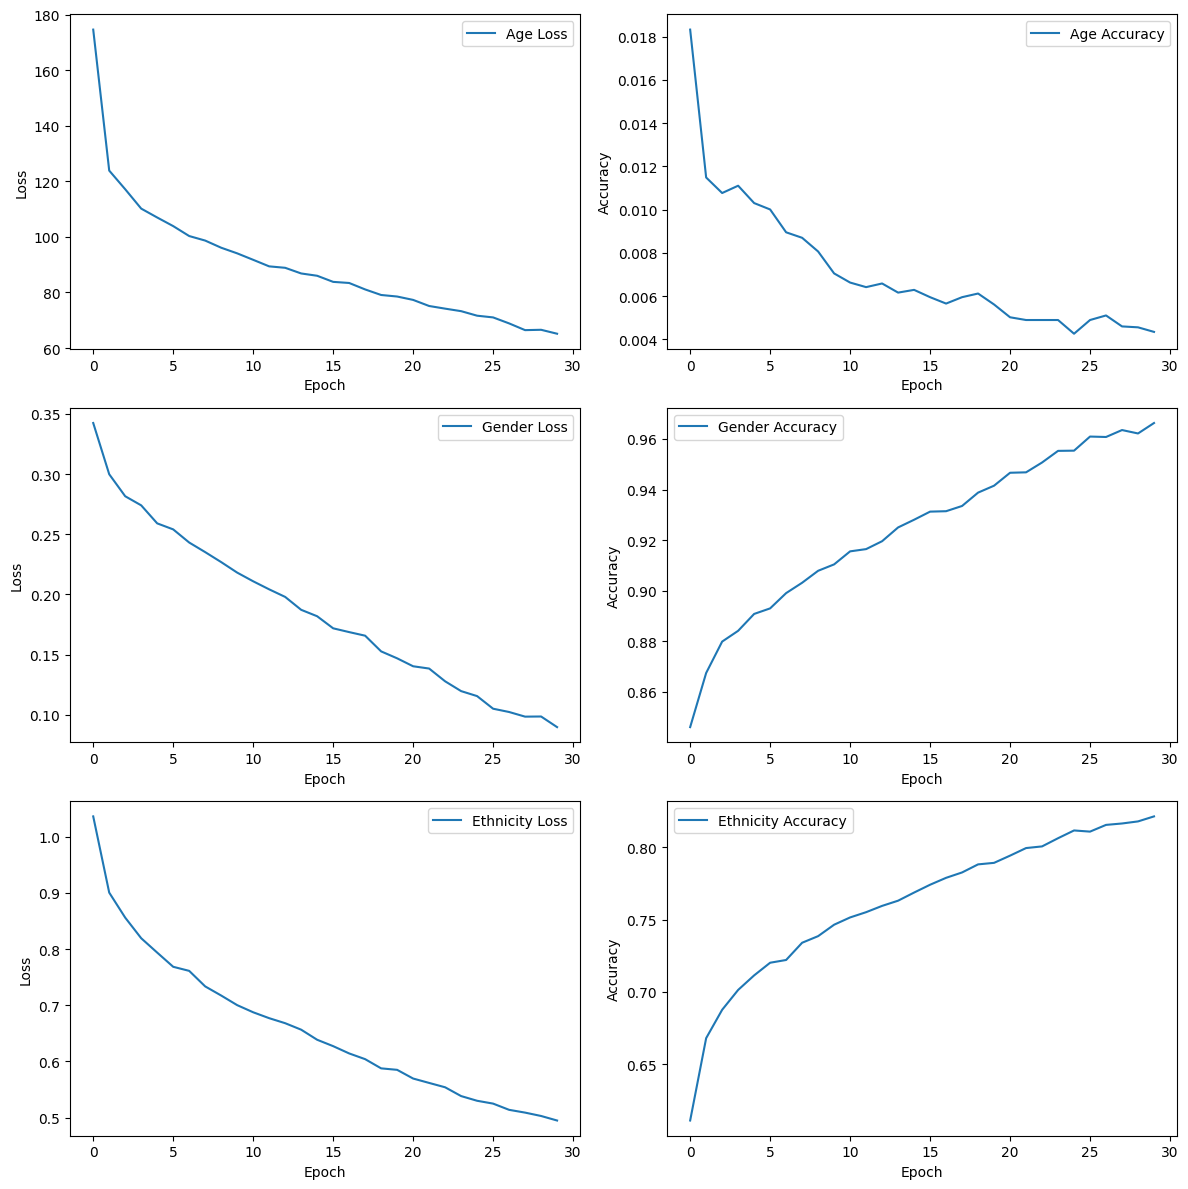

In [38]:
plt.figure(figsize=(12, 12))

# Plotting age-related metrics
plt.subplot(3, 2, 1)
plt.plot(history.history['age_loss'], label='Age Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(history.history['age_accuracy'], label='Age Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting gender-related metrics
plt.subplot(3, 2, 3)
plt.plot(history.history['gender_loss'], label='Gender Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(history.history['gender_accuracy'], label='Gender Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting ethnicity-related metrics
plt.subplot(3, 2, 5)
plt.plot(history.history['ethnicity_loss'], label='Ethnicity Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(history.history['ethnicity_accuracy'], label='Ethnicity Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
model.save("MTL-30epoch-inception.h5")

Enter Image Path:  /kaggle/input/datagg/kid.jpeg


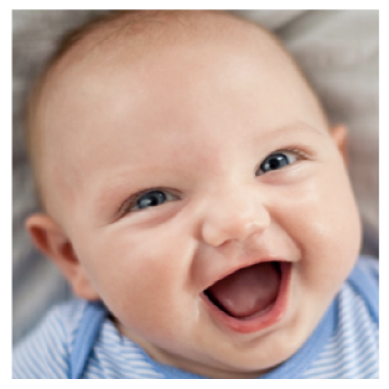

1/1 [==============================] - 0s 33ms/step
Age Prediction: 3.5085018920898436
Gender Prediction: Male
Ethnicity Prediction: White


In [119]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt


# Define the preprocessing function
def load_and_preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (299, 299))
    image = preprocess_input(image)
    return image

# Get the path to your custom image
img_path = input("Enter Image Path: ")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess the image

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions using the loaded model
age_prediction, gender_prediction, ethnicity_prediction = model.predict(img_array)

# Post-process the predictions if needed
scaled_age_prediction = (age_prediction[0][0] / 100) 
gender = "Female" if gender_prediction[0] > 0.1 else "Male"

# Map ethnicity prediction indices to corresponding ethnicities
ethnicity_mapping = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}
predicted_ethnicity_index = np.argmax(ethnicity_prediction[0])
ethnicity = ethnicity_mapping[predicted_ethnicity_index]

# Convert the ethnicity label 'Asian' or 'Indian'
if predicted_ethnicity_index in [2, 3]:
    ethnicity = 'Asian' if predicted_ethnicity_index == 2 else 'Indian'

# Print the predictions
print(f'Age Prediction: {scaled_age_prediction}')
print(f'Gender Prediction: {gender}')
print(f'Ethnicity Prediction: {ethnicity}')
